<a href="https://colab.research.google.com/github/nvlszaaby/Kalman-Filters/blob/master/Kalman_Filter_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman Filter

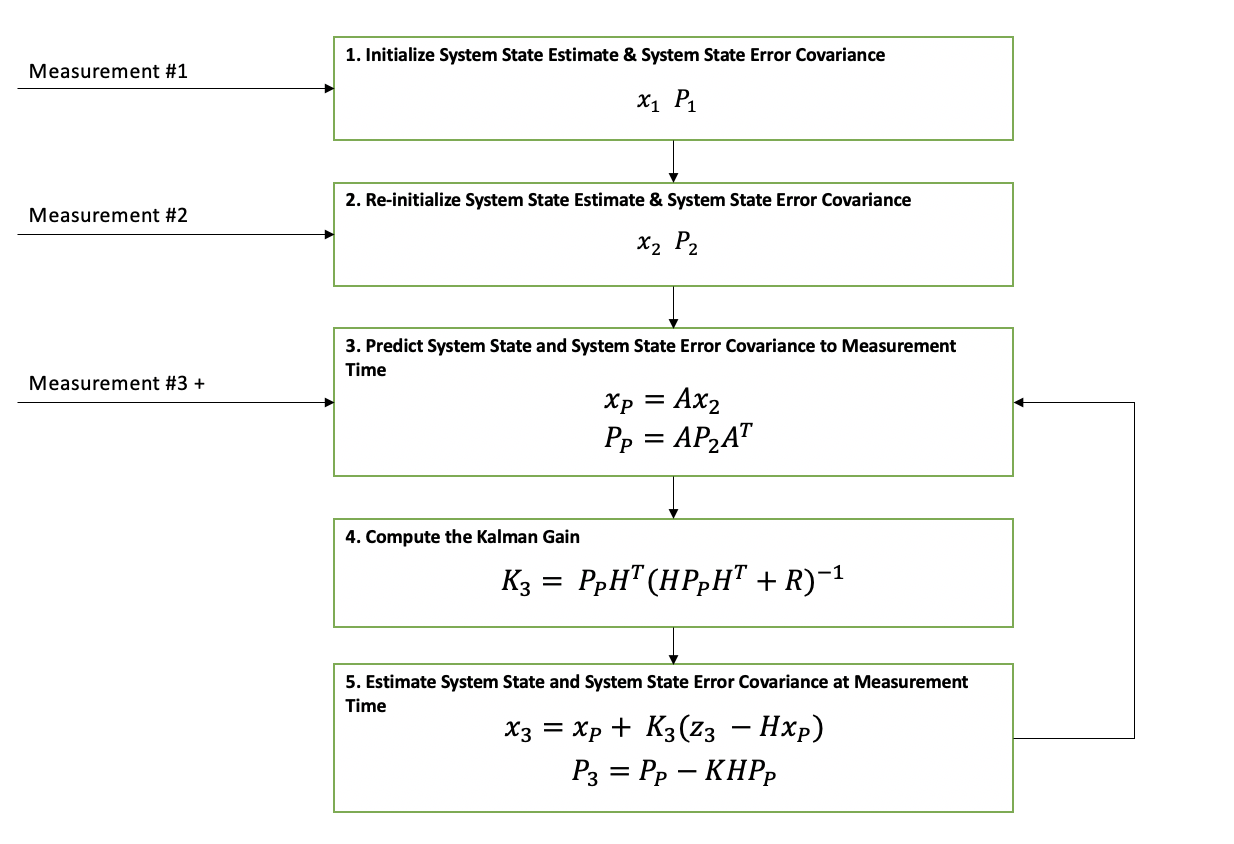

## Import Library

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Compute Measurements

In order to build and test a Kalman Filter, a set of input data is needed. For this example, the getMeasurement(…) function is used to simulate a sensor providing real-time position measurements of a performance automobile as it races down a flat road with a constant velocity of 60 meters per second.

This function initializes the position at 0 and velocity at 60 meters per second. Next, random noise, `v`, is computed and added to position measurement. Additional random noise, `w`, is computed and added to the velocity to account for small random accelerations. Lastly, the `current position` and `current velocity` are retained as truth data for the next measurement step.

In [33]:
def getMeasurement(updateNumber):
    if updateNumber == 1:
      getMeasurement.currentPosition = 0
      getMeasurement.currentVelocity = 60 # m/s

    dt = 0.1

    w = 8 * np.random.randn(1) #Return a sample (or samples) from the “standard normal” distribution.
    v = 8 * np.random.randn(1)

    z = getMeasurement.currentPosition + getMeasurement.currentVelocity*dt + v
    getMeasurement.currentPosition = z - v
    getMeasurement.currentVelocity = 60 + w
    return [z, getMeasurement.currentPosition, getMeasurement.currentVelocity]

## Filter Measurements

When the first measurement is reported, the filter is initialized. The measurement is in the following structures. `z` is the position measurement, `R` is the position variance, and `t` is the timestamp of the measurement.

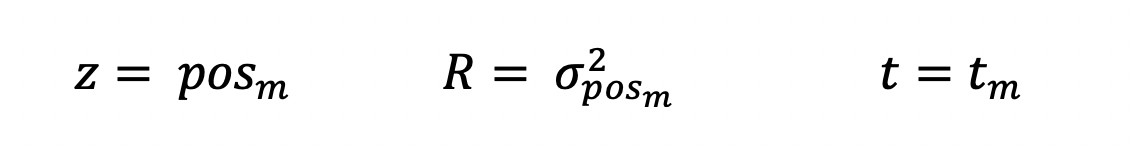

`x` is the two element state vector for position and velocity. `P` is the 2×2 state covariance matrix representing the uncertainty in `x`. `T` is the timestamp for the estimate.

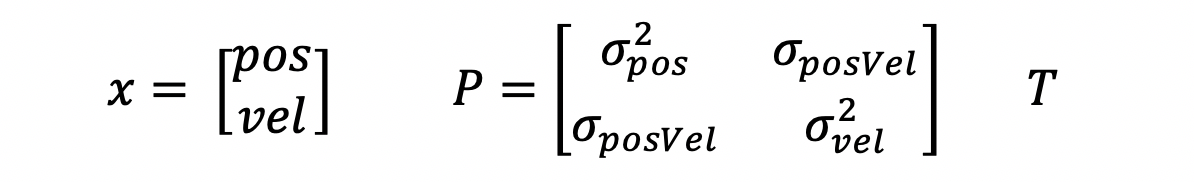

`A` is the state transition matrix for a system model that assumes constant linear motion. `H` is the state to measurement transition matrix. `HT` is the `H` matrix transposed. `R` is the input measurement variance. `Q` is the 2×2 system noise covariance matrix. `Q` accounts for inaccuracy in the system model.

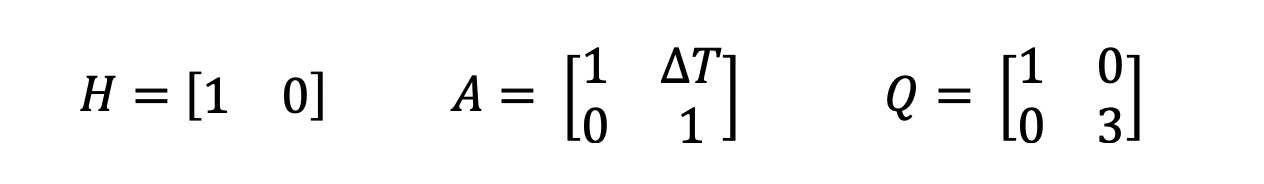

All measurements, after the first one, are filtered into the track state. First, the predicted state, `xP`, and predicted state covariance, `PP`, are computed by propagating the existing state and state covariance in time to align with the new measurements.

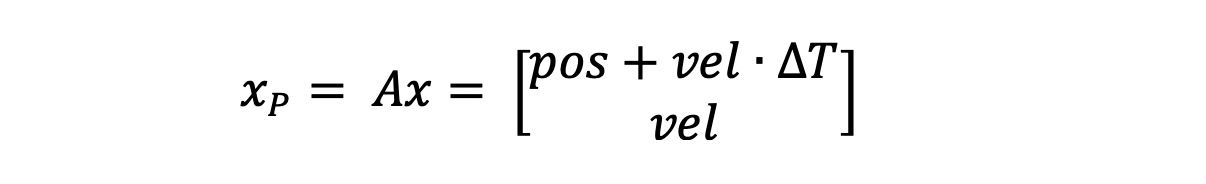

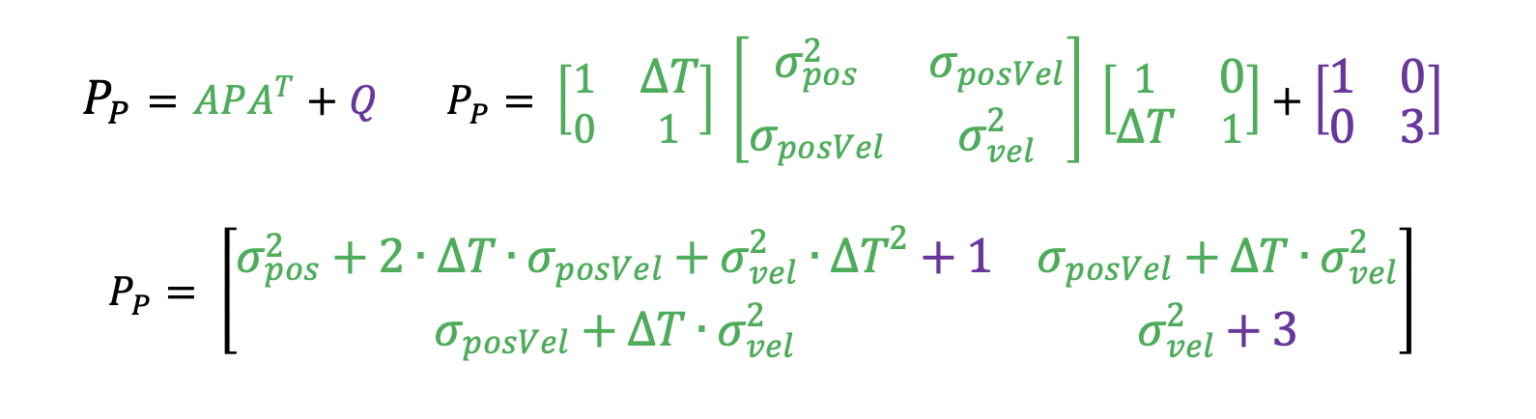

For this example, it is assumed that measurements have a 10/second and therefore a delta time, `dt`, of 0.1 seconds is used. Next the Kalman Gain, `K`, is computed using the input measurement uncertainty, `R`, and the predicted state covariance matrix, `PP`. This computation was broken down into two steps, first compute the innovation, `S`, and then compute the Kalman Gain, `K`, with the innovation.

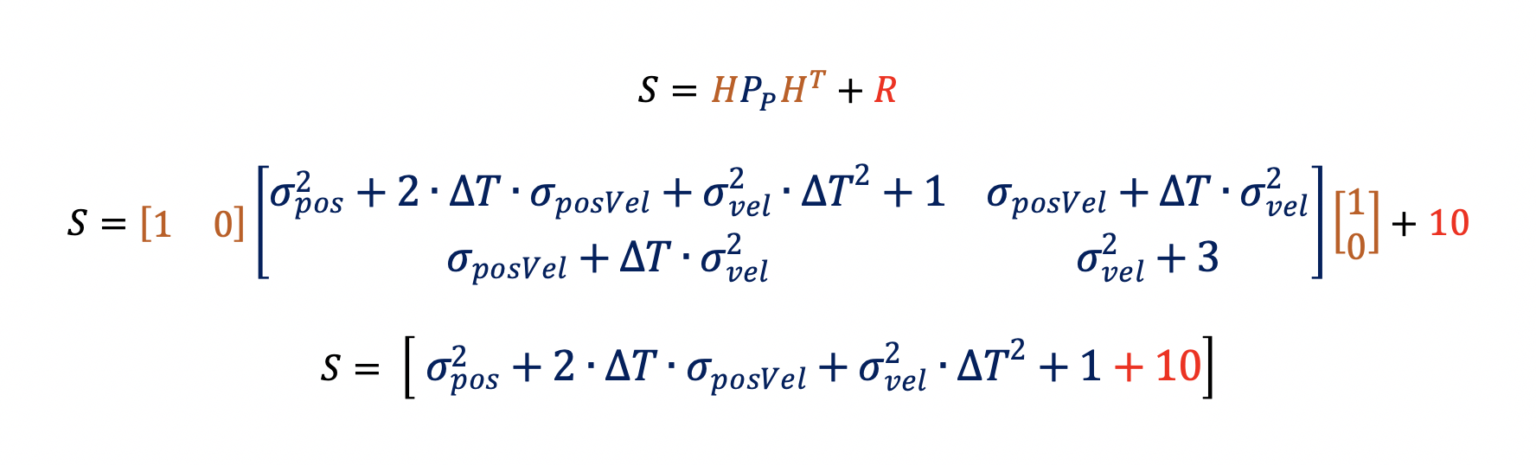

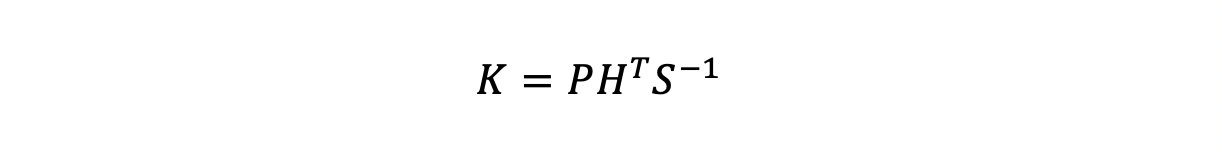

Lastly, the Kalman Gain, `K`, is used to compute the new state, `x`, and state covariance estimate, `P`.

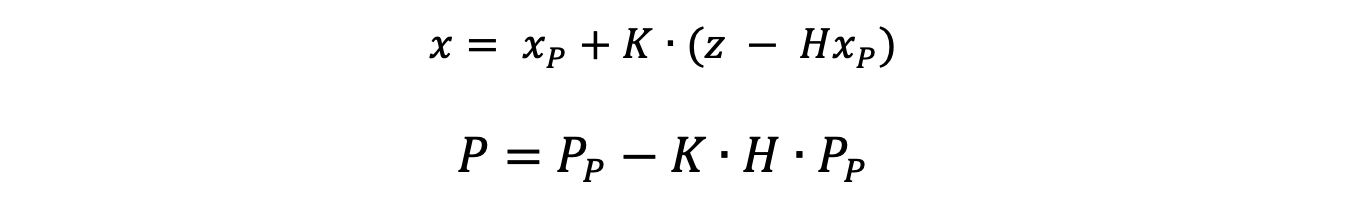

In [22]:
def filter(z, updateNumber):
    dt = 0.1
    # Initialize State
    if updateNumber == 1:
        filter.x = np.array([[0],
                            [60]])
        filter.P = np.array([[5, 0],
                                 [0, 5]])

        filter.A = np.array([[1, dt],
                             [0, 1]])
        filter.H = np.array([[1, 0]])
        filter.HT = np.array([[1],
                              [0]])
        filter.R = 10
        filter.Q = np.array([[1, 0],
                             [0, 3]])

    # Predict State Forward
    x_p = filter.A.dot(filter.x)
    # Predict Covariance Forward
    P_p = filter.A.dot(filter.P).dot(filter.A.T) + filter.Q
    # Compute Kalman Gain
    S = filter.H.dot(P_p).dot(filter.HT) + filter.R
    K = P_p.dot(filter.HT)*(1/S)

    # Estimate State
    residual = z - filter.H.dot(x_p)
    filter.x = x_p + K*residual

    # Estimate Covariance
    filter.P = P_p - K.dot(filter.H).dot(P_p)

    return [filter.x[0], filter.x[1], filter.P];

**Test Kalman Filter**

In [49]:
def testFilter():
    dt = 0.1
    t = np.linspace(0, 10, num=300)
    numOfMeasurements = len(t)

    measTime = []
    measPos = []
    measDifPos = []
    estDifPos = []
    estPos = []
    estVel = []
    posBound3Sigma = []

    for k in range(1,numOfMeasurements):
        z = getMeasurement(k)
        # Call Filter and return new State
        f = filter(z[0], k)
        # Save off that state so that it could be plotted
        measTime.append(k)
        measPos.append(z[0])
        measDifPos.append(z[0]-z[1])
        estDifPos.append(f[0]-z[1])
        estPos.append(f[0])
        estVel.append(f[1])
        posVar = f[2]
        posBound3Sigma.append(3*np.sqrt(posVar[0][0]))

    return [measTime, measPos, estPos, estVel, measDifPos, estDifPos, posBound3Sigma];

In [62]:
def checkDataMeasurement():
    dt = 0.1
    t = np.linspace(0, 10, num=300)
    numOfMeasurements = len(t)

    for k in range(1,numOfMeasurements):
        z = getMeasurement(k)
        z1 = print(z)
        # Call Filter and return new State
        # f = filter(z[0], k)
        # f1 = print('Position, velocity')
        # f11 = print(f)
        # Save off that state so that it could be plotted

    return [z1];

print('Position Measurements, Current Position, Current Velocity')
checkDataMeasurement()

In [70]:
def checkDataFilter():
    dt = 0.1
    t = np.linspace(0, 10, num=300)
    numOfMeasurements = len(t)

    for k in range(1,numOfMeasurements):
        z = getMeasurement(k)
        # Call Filter and return new State
        f = filter(z[0], k)
        f1 = print(f)

    return [f1];

print('X[0], X[1], Covariance')
checkDataFilter()

X[0], X[1], Covariance
[array([7.62328569]), array([60.13415584]), array([[3.7694704 , 0.31152648],
       [0.31152648, 7.98442368]])]
[array([11.03365025]), array([59.54589666]), array([[ 3.2938205 ,  0.74436503],
       [ 0.74436503, 10.90180148]])]
[array([13.49772253]), array([58.13906061]), array([[ 3.12795613,  1.2607075 ],
       [ 1.2607075 , 13.67051899]])]
[array([21.27662939]), array([59.2822474]), array([[ 3.11143085,  1.81015023],
       [ 1.81015023, 16.19485506]])]
[array([24.87680912]), array([57.55977898]), array([[ 3.16725642,  2.34338216],
       [ 2.34338216, 18.39116034]])]
[array([32.31480699]), array([59.0193791]), array([[ 3.25229085,  2.82222813],
       [ 2.82222813, 20.21076394]])]
[array([33.5089174]), array([54.47621304]), array([[ 3.34169799,  3.22481843],
       [ 3.22481843, 21.64888617]])]
[array([41.15682843]), array([56.75539311]), array([[ 3.42241598,  3.54512509],
       [ 3.54512509, 22.7381676 ]])]
[array([53.3808443]), array([63.8661349]), array(

[None]

In [47]:
t = np.linspace(0, 10, num=300)
numOfMeasurements = len(t)
print(t)
print(numOfMeasurements)

[ 0.          0.03344482  0.06688963  0.10033445  0.13377926  0.16722408
  0.2006689   0.23411371  0.26755853  0.30100334  0.33444816  0.36789298
  0.40133779  0.43478261  0.46822742  0.50167224  0.53511706  0.56856187
  0.60200669  0.63545151  0.66889632  0.70234114  0.73578595  0.76923077
  0.80267559  0.8361204   0.86956522  0.90301003  0.93645485  0.96989967
  1.00334448  1.0367893   1.07023411  1.10367893  1.13712375  1.17056856
  1.20401338  1.23745819  1.27090301  1.30434783  1.33779264  1.37123746
  1.40468227  1.43812709  1.47157191  1.50501672  1.53846154  1.57190635
  1.60535117  1.63879599  1.6722408   1.70568562  1.73913043  1.77257525
  1.80602007  1.83946488  1.8729097   1.90635452  1.93979933  1.97324415
  2.00668896  2.04013378  2.0735786   2.10702341  2.14046823  2.17391304
  2.20735786  2.24080268  2.27424749  2.30769231  2.34113712  2.37458194
  2.40802676  2.44147157  2.47491639  2.5083612   2.54180602  2.57525084
  2.60869565  2.64214047  2.67558528  2.7090301   2

**Plot Kalman Filter Results**

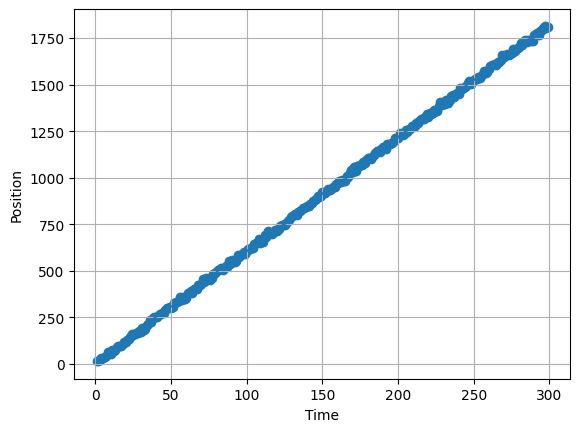

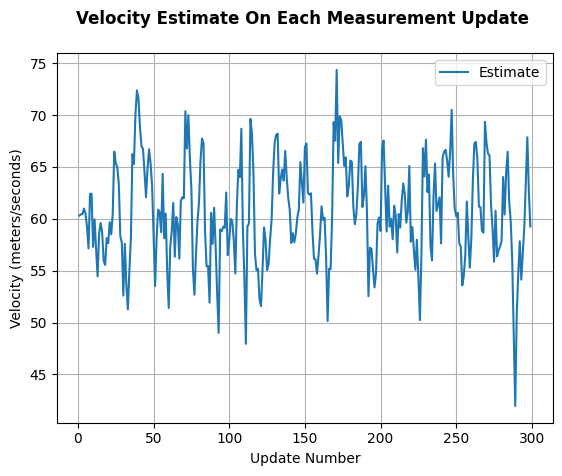

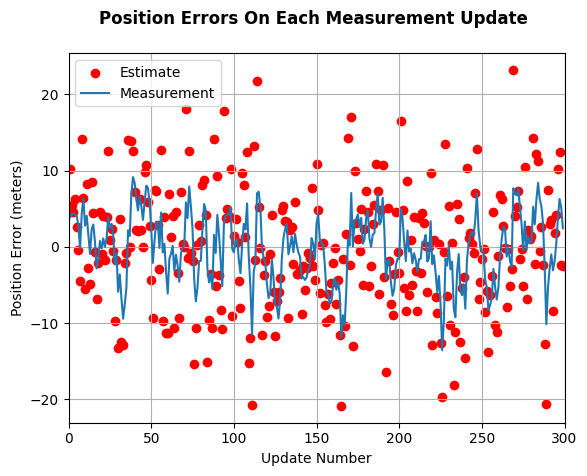

In [50]:
t = testFilter()

plot1 = plt.figure(1)
plt.scatter(t[0], t[1])
plt.plot(t[0], t[2])
plt.ylabel('Position')
plt.xlabel('Time')
plt.grid(True)

plot2 = plt.figure(2)
plt.plot(t[0], t[3])
plt.ylabel('Velocity (meters/seconds)')
plt.xlabel('Update Number')
plt.title('Velocity Estimate On Each Measurement Update \n', fontweight="bold")
plt.legend(['Estimate'])
plt.grid(True)

plot3 = plt.figure(3)
plt.scatter(t[0], t[4], color = 'red')
plt.plot(t[0], t[5])
plt.legend(['Estimate', 'Measurement'])
plt.title('Position Errors On Each Measurement Update \n', fontweight="bold")
#plt.plot(t[0], t[6])
plt.ylabel('Position Error (meters)')
plt.xlabel('Update Number')
plt.grid(True)
plt.xlim([0, 300])
plt.show()